In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
import sys 

sys.path.append("../../tools")
from plot_tools import plot_uv_map,plot_map_zoom



base_output="/Odyssey/private/t22picar/multivar_drifter/outputs"
xp_name='unet_uv_drifters_aoml_15m_10y_11d_bathy_no_sst_mae_patch'
#result_filepath = "/Odyssey/private/t22picar/multivar_uv/rec/ssh_duacs_sst_w_to_u_v_11d_15m_psi/daily/unet_rec_2019-01-01.nc"
utot =  f"{base_output}/saved/{xp_name}/{xp_name}/test_data_dim0.nc"
utot = xr.open_dataset(utot)
#utot

vtot =  f"{base_output}/saved/{xp_name}/{xp_name}/test_data_dim1.nc"
vtot = xr.open_dataset(vtot)
vtot

rec_gc = "/Odyssey/private/t22picar/data/uv/globcurrent_15.00m_2019-01-01-2020-01-01.nc"
rec_gc = xr.open_dataset(rec_gc).isel(depth=0)
rec_gc

<xarray.Dataset> Size: 6GB
Dimensions:    (latitude: 720, longitude: 1440, time: 366)
Coordinates:
    depth      int16 2B 15
  * latitude   (latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * time       (time) datetime64[ns] 3kB 2019-01-01 2019-01-02 ... 2020-01-01
Data variables:
    uo         (time, latitude, longitude) float64 3GB ...
    vo         (time, latitude, longitude) float64 3GB ...
Attributes:
    Conventions:               CF-1.6
    references:                Mulet S., Rio M.-H., Etienne H., Artana C., Ca...
    title:                     Daily mean total surface and 15m velocities
    institution:               CLS
    contact:                   servicedesk.cmems@mercator-ocean.eu
    copernicusmarine_version:  2.0.1

In [5]:
lat_min= -70
lat_max = 70
lon_max = 180
lon_min = -180

lat_min= 18
lat_max = 70
lon_max = 40
lon_min = -100


zoom_extent=[lon_min,lon_max,lat_min,lat_max]

zoom_ax = [0, 0, 1, 1]

index=200

norm_gc = rec_gc.uo[index]**2 + rec_gc.vo[index]**2

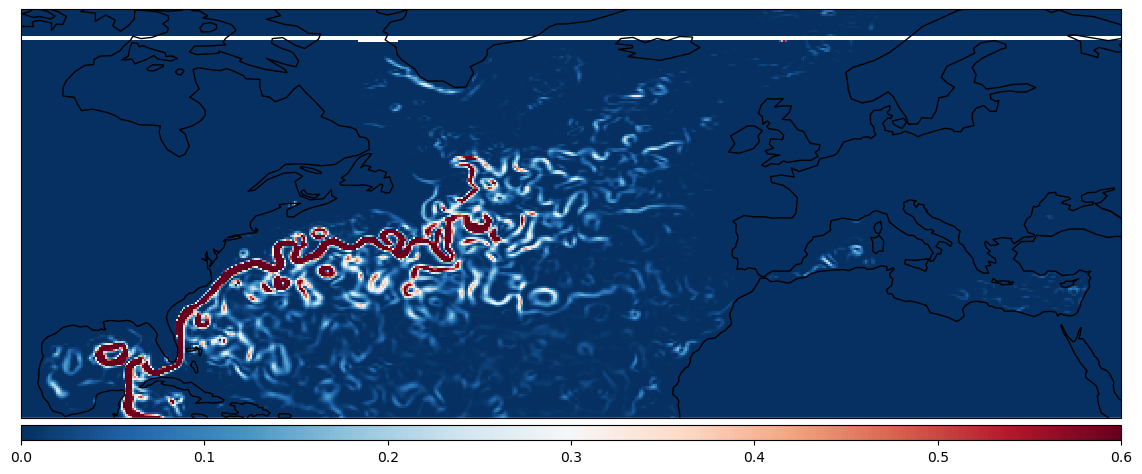

In [6]:
norm = utot.out[index]**2+ vtot.out[index]**2
plot_map_zoom(norm,utot.lon,utot.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,title=utot.time.values[index],vmin=0,vmax=0.6)

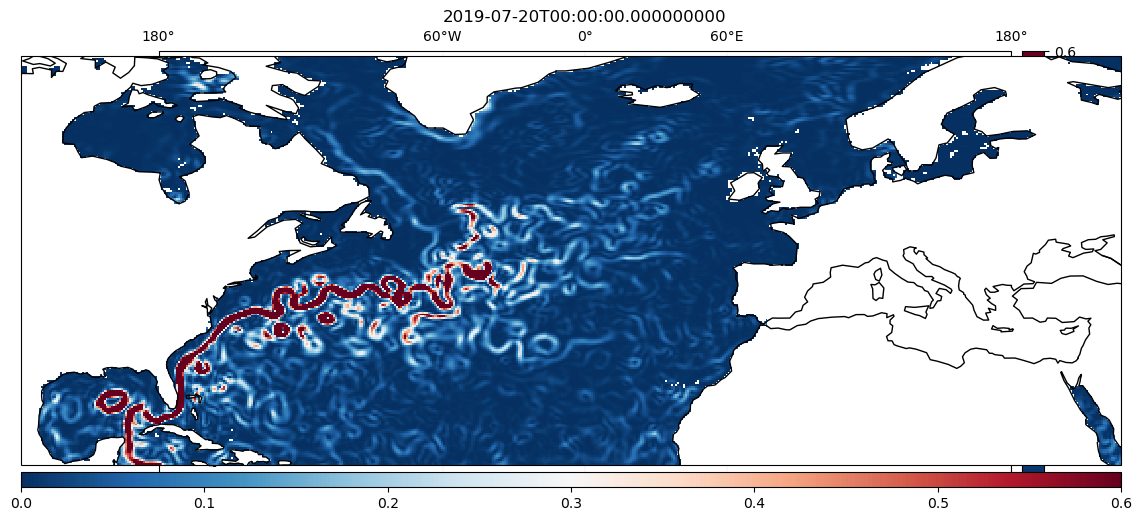

In [7]:
plot_map_zoom(norm_gc,rec_gc.longitude,rec_gc.latitude,zoom_extent=zoom_extent,zoom_ax=zoom_ax,title=utot.time.values[index],vmin=0,vmax=0.6)

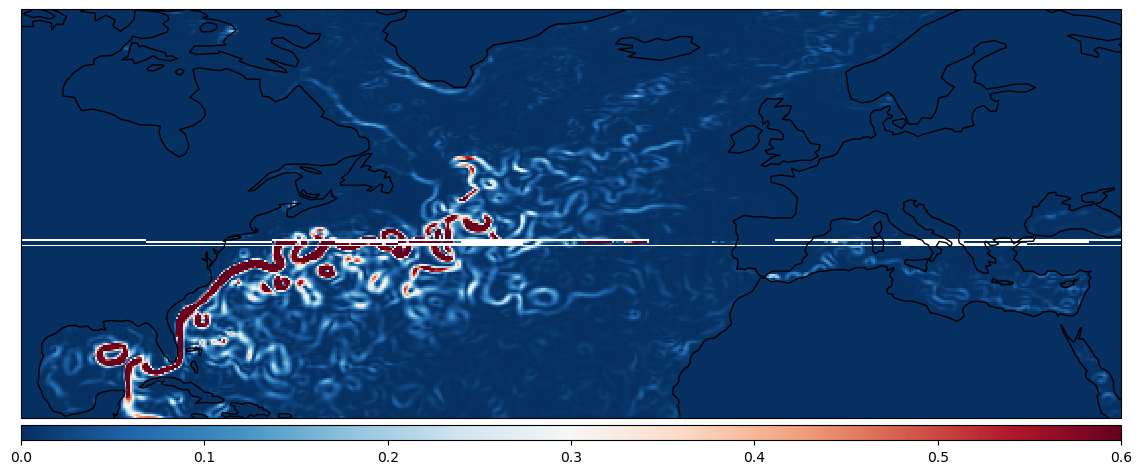

In [58]:
utot.time.values[index]

numpy.datetime64('2019-07-20T00:00:00.000000000')

In [59]:
# Comparison with duacs 

duacs =  "/Odyssey/private/t22picar/data/ssh_L4/SSH_L4_CMEMS_2010-01-01-2024-01-01.nc"
duacs = xr.open_dataset(duacs).sel(time="2019-07-20").sel(longitude=slice(lon_min,lon_max)).sel(latitude=slice(lat_min,lat_max))
norm_duacs = duacs.ugos**2 +  duacs.vgos**2

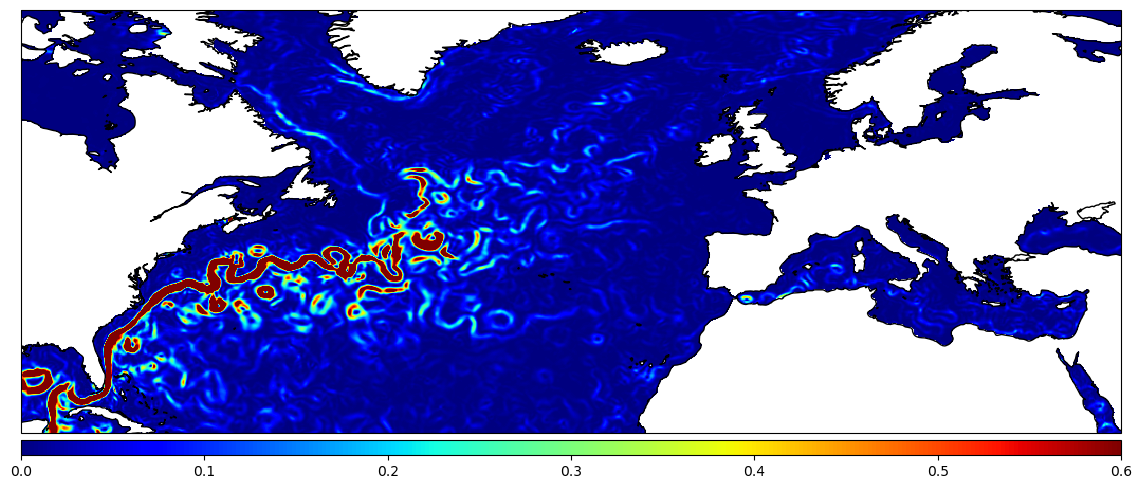

In [60]:
plot_map_zoom(norm_duacs,utot.lon,utot.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,title=utot.time.values[0],vmin=0,vmax=0.6,cmap=plt.cm.jet)

In [61]:
diff_norm = norm.values - norm_duacs.values

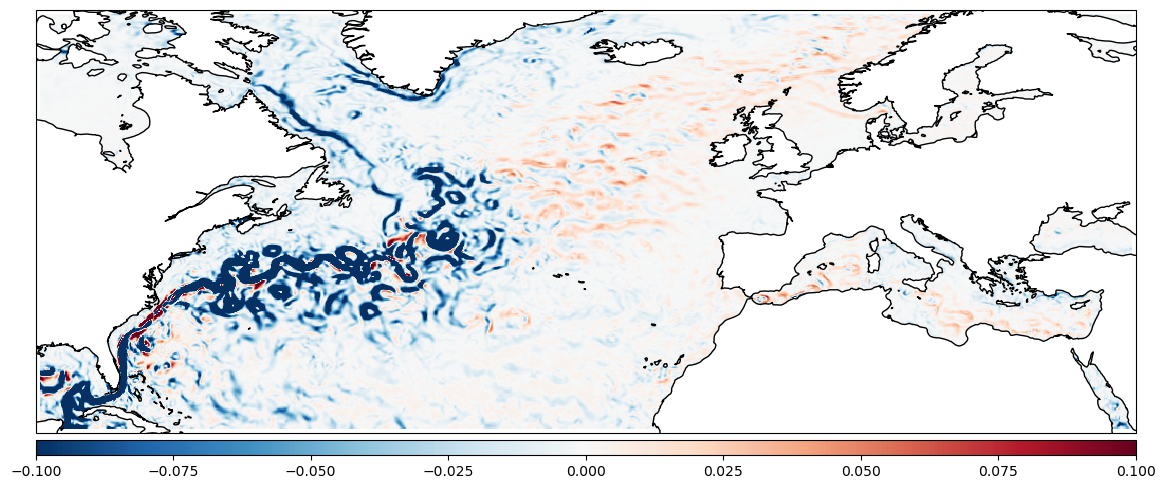

In [62]:
plot_map_zoom(diff_norm,utot.lon,utot.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,title=utot.time.values[0],vmin=-0.1,vmax=0.1)